In [ ]:
!pip install openml

In [ ]:
import openml
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from openml.datasets import edit_dataset, fork_dataset, get_dataset

In [ ]:
# This is done based on the dataset ID.
dataset = openml.datasets.get_dataset(42890)

# Storing the data
eeg, *_ = dataset.get_data()

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [ ]:
eeg.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
# Grab the only columns worth doing PCA on
columns_pca = ['Air temperature [K]', 'Process temperature [K]',
               'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
               'Machine failure',	'TWF',	'HDF',	'PWF',	'OSF',	'RNF']

eeg_selected = eeg[columns_pca]

In [ ]:
# Grab the only columns worth doing PCA on
columns_pca = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

eeg_selected = eeg[columns_pca]

In [ ]:
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_selected)

In [ ]:
my_pca = PCA(n_components=2)
principal_components = my_pca.fit_transform(eeg_scaled)

In [ ]:
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [ ]:
pca_df

,Principal Component 1,Principal Component 2
0,-1.093847,0.854210
1,-1.602678,0.215765
2,-1.599406,0.401641
3,-1.230438,0.664604
4,-1.289814,0.535153
...,...,...
9995,-0.177289,1.570849
9996,-0.187299,1.507031
9997,-0.135675,1.369578
9998,-1.503234,-0.098655


In [ ]:
print(pca_df.head())

   Principal Component 1  Principal Component 2
0              -1.093847               0.854210
1              -1.602678               0.215765
2              -1.599406               0.401641
3              -1.230438               0.664604
4              -1.289814               0.535153


In [ ]:
eeg['Combined failures'] = eeg['Machine failure'].astype(str) + "-" + eeg['TWF'].astype(str) + "-" + eeg['HDF'].astype(str) + "-" + eeg['PWF'].astype(str) + "-" + eeg['OSF'].astype(str) + "-" + eeg['RNF'].astype(str)

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


[Text(0.5, 1.0, 'PCA 2')]

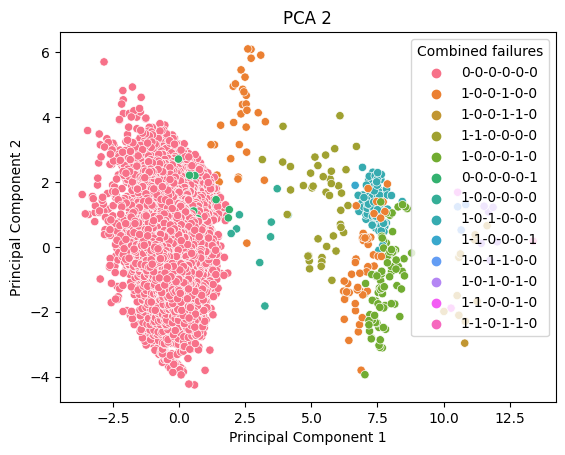

In [ ]:
sns.scatterplot(data=pca_df, x="Principal Component 1", y="Principal Component 2", hue=eeg['Combined failures'], cmap='viridis').set(title='PCA 2')

# Result

There is really no distinct clustering here, this doesn't help piece out certain groups

